In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp

# **Quadratic Splines**

In [2]:
def linear_inter(x, y):
    x1 = x[0]
    x2 = x[1]
    y1 = y[0]
    y2 = y[1]
    a = (y2 - y1)/(x2 - x1)
    b = y1 - a * x1
    y1 = a * x1 + b
    y2 = a * x2 +b 
    x = [x1, x2]
    y = [y1, y2]
    plt.plot(x, y)
    return a, b

In [3]:
def quad_splines(x, y, C0, C1, C2):
    X = [[0,0,0],[0,0,0],[0,0,0]]
    Y = [y[0], y[1], 2 * C1 * x[1] + C2]
    for i in range(2):
        X[i][0] = x[i] ** 2
        X[i][1] = x[i]
        X[i][2] = 1
    X[2][0] = 2 * x[1]
    X[2][1] = 1
    X[2][2] = 0
    C = np.linalg.solve(X, Y)
    return C
    # P = C[0] * x ** 2 + C[1] * x + C[2]
    # plt.plot(x, P)

ValueError: x and y must have same first dimension, but have shapes (2,) and (10,)

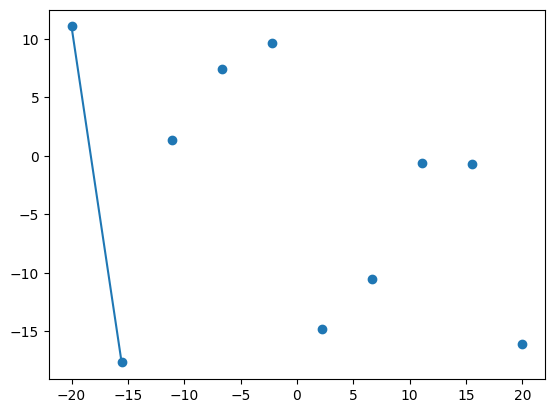

In [12]:
x = np.linspace(-20, 20, 10)
y = np.random.uniform(-20, 20, 10)
l = len(x)
plt.scatter(x, y)
b1, c1 = linear_inter([x[0], x[1]], [y[0], y[1]])
C = [0, b1, c1]
for i in range(1, l - 2):
    var = np.array([x[i], x[i + 1]])
    fun = np.array([y[i], y[i + 1]])
    C = quad_splines(var, fun, C[0], C[1], C[2])
    P = C[0] * x ** 2 + C[1] * x + C[2]
    plt.plot([x[i], x[i+1]], [P[i], P[i+1]])
x1, x2, y1, y2 = x[l-2], x[l-1], y[l-2], y[l-1]
b2, c2 = linear_inter([x1, x2], [y1, y2])
plt.show()

# **Cubic Splines**

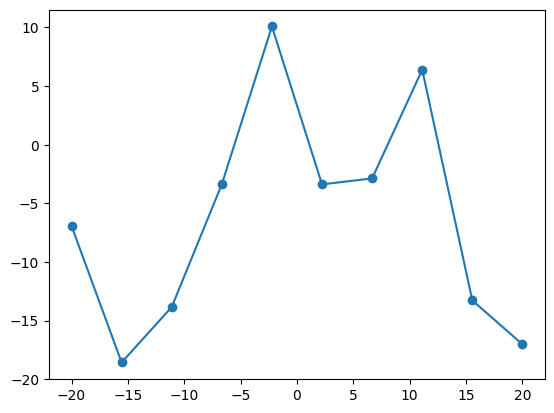

In [5]:
x = np.linspace(-20, 20, 10)
y = np.random.uniform(-20, 20, 10)
plt.scatter(x, y)
P = scp.interpolate.CubicSpline(x, y)
plt.plot(x, P(x))
plt.show()
